In [1]:
from data import load_data
import numpy as np
import skimage.io as io
from models.fcn32 import FCN32
from models.fcn16 import FCN16
from utils.prediction import predict

Using TensorFlow backend.


# Raw Data Exploration

In [2]:
DATA_PATH = "VOCdevkit/VOC2012/"

img = io.imread(DATA_PATH + "JPEGImages/" + "2007_000032.jpg")
seg = io.imread(DATA_PATH + "SegmentationClass/" + "2007_000032.png")

In [3]:
print("type and shape of the image:")
print(type(img), img.shape)
print("type and shape of the segmentation:")
print(type(seg), seg.shape)

type and shape of the image:
<class 'numpy.ndarray'> (281, 500, 3)
type and shape of the segmentation:
<class 'numpy.ndarray'> (281, 500, 3)


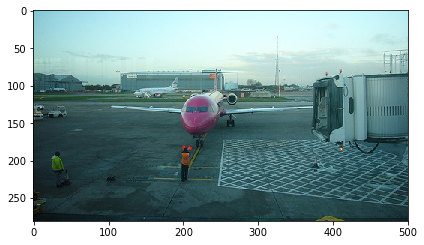

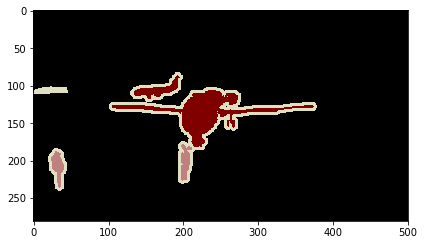

In [4]:
io.imshow(img)
io.show()
io.imshow(seg)
io.show()

# Training Data Exploration

In [5]:
imgs, masks = load_data()

In [6]:
print("type and shape of imags:")
print(type(imgs), imgs.shape)
print("type and shape of masks:")
print(type(masks), masks.shape)

type and shape of imags:
<class 'numpy.ndarray'> (2913, 224, 224, 3)
type and shape of masks:
<class 'numpy.ndarray'> (2913, 224, 224, 1)


(224, 224, 3)
[[[-0.71037936 -0.49393231 -1.40300989]
  [-0.69594955 -0.34963426 -1.27314162]
  [-0.26305544  0.01111079 -0.92682636]]

 [[-0.56608129 -0.32077467 -1.25871181]
  [-0.68151975 -0.32077467 -1.24428201]
  [-0.29191506 -0.00331901 -0.91239655]]

 [[-0.56608129 -0.29191506 -1.27314162]
  [-0.53722173 -0.16204683 -1.18656278]
  [-0.39292368 -0.07546803 -1.14327335]]]


/home/charlioxumykj/miniconda3/envs/dlnd/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


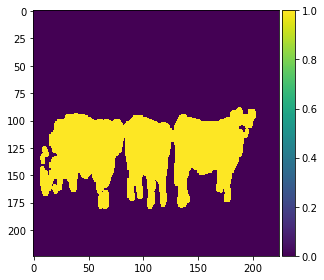

/home/charlioxumykj/miniconda3/envs/dlnd/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: mask_demo.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [14]:
#io.imshow(imgs[0])
print(imgs[0].shape)
print(imgs[0, :3, :3])
#io.imsave(imgs[0], "demo.jpg")
#io.show()
mask = np.squeeze(masks[0], -1).astype(int)
io.imshow(mask)
io.show()
io.imsave("mask_demo.png", mask*255)

# FCN32 Model Prediction Demo

In [ ]:
fcn32 = FCN32()
fcn32.load_weights("saved_models/fcn32_7761.h5")

In [ ]:
mask = predict(fcn32, "VOCdevkit/VOC2012/JPEGImages/2007_003143.jpg")

from skimage.transform import resize
img = io.imread("VOCdevkit/VOC2012/JPEGImages/2007_003143.jpg")
img =resize(img, (224, 224, 3))
#io.imsave("demo_1.png", img)
#io.imsave("fcn32_demo_1.png", mask)

# FCN16 Model Prediction Demo

In [ ]:
fcn16 = FCN16()
fcn16.load_weights("saved_models/fcn16_7835.h5")

In [ ]:
mask = predict(fcn16, "VOCdevkit/VOC2012/JPEGImages/2007_003143.jpg")
#io.imsave("fcn16_demo_1.png", mask)